<div style="text-align: center;">
    <h1><strong>ROC-curve Generator</strong></h1>
</div>

#### Imports

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

#### Load saved values

In [6]:
epoch = 9
y_true = np.load(f"roc-curves/roc_labels{epoch}.npy")
y_scores = np.load(f"roc-curves/roc_probabilities{epoch}.npy")

#### Introduce label map

In [7]:
label_map = {
    "AnnualCrop": 0,
    "Forest": 1,
    "HerbaceousVegetation": 2,
    "Highway": 3,
    "Industrial": 4,
    "Pasture": 5,
    "PermanentCrop": 6,
    "Residential": 7,
    "River": 8,
    "SeaLake": 9
}
inv_label_map = {v: k for k, v in label_map.items()}  # Reverse mapping (index -> class name)

#### Generation

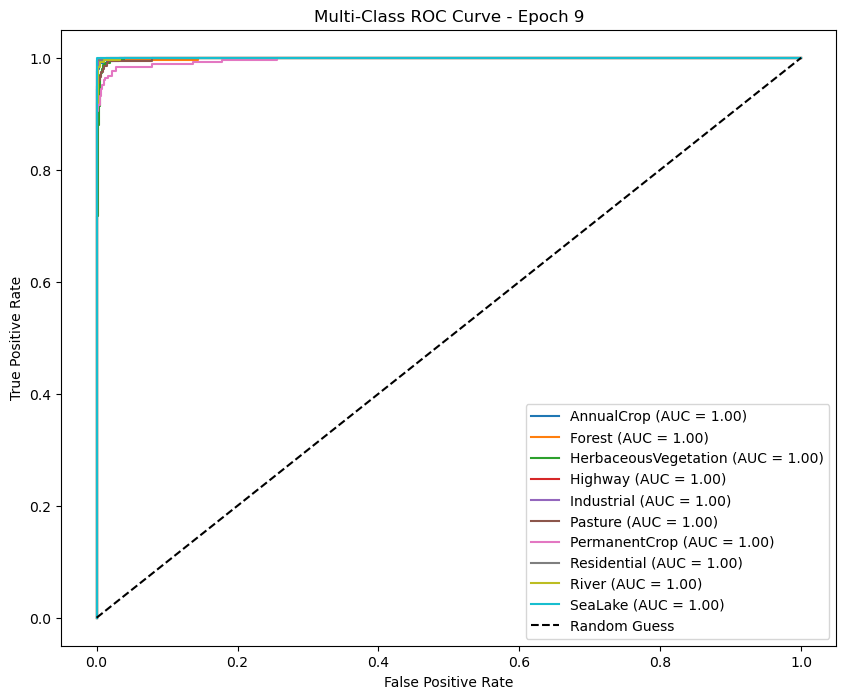

In [12]:
plt.figure(figsize=(10, 8))

num_classes = y_scores.shape[1]
for i in range(num_classes):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    class_name = inv_label_map[i]

    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Multi-Class ROC Curve - Epoch {epoch}")
plt.legend()
plt.show()